<a href="https://colab.research.google.com/github/kimgeonhee317/sd-workspace/blob/main/template/Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


### 1. Module and libraries


In [3]:
# pip module download
!pip install diffusers==0.11.1
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 natsort safetensors xformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.7 MB/s eta 0:00:00


In [4]:
# import library
import torch
from diffusers import StableDiffusionPipeline

### 2. Model

In [5]:
# https://huggingface.co/stabilityai/stable-diffusion-2-1
model_id = "stabilityai/stable-diffusion-2-1"



### 3. Pipe setting

In [6]:
# pipe setting
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

### 4. Scheduler

In [7]:
from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

### 5. Function and Variables

In [8]:
from PIL import Image

def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.ANTIALIAS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

In [9]:
seed = 317

## Prompt

### 1. Positive
+ art : Painting, Photo, Drawing, 3D rendering, Oil painting, watercolor painting, Portrait, Sketch, Digital painting, Concept art, Ultra realistic illustration, Underwater portrait, Underwater steampunk
+ style: realistic, hyperrealistic, pop-art, modernist, art nouveau, surrealist
+ color: vivid, tones or colors, bw (black and white),vintage, gold, silver, etc.
+ artist: Van Gogh, John Collier, Monet, Alphonse Mucha, Salvador Dali, Rembrandt, Da Vinci, etc.
(https://www.urania.ai/top-sd-artists)
+ resolution: highly detailed, unreal engine (detailed and realistic 3D), sharp focus, hd, 4k or 8k, vray (3D renderizations - good results for landscapes)
+ site: artstation (art and design), pixabay, unsplash, pexels, pixiv (Japanese virtual community. It will return anime-style images)
+ others:
  + Ilumination: cinematic lighting, rim lighting, natural light, side light, sunset or golden hour
Change the vibe: dramatic, sci-fi, dystopian.

  + Add more aesthetics: stunningly beautiful, award winning photo, masterpiece.

  + Terms associated with photography (camera millimeter): 35mm, 50mm, 80mm, 85mm, wide angle, analog, fisheye lens, gopro, dslr, film, tilt-shift.

  + etc: blurred background, psychodelic, low angle shot, frontal face, expansive, detailed clothing



In [42]:
desc = "cat" # subject, action, location
art = ", watercolor painting"
style = ", "
color = ", "
#artist = ", "
resolution =
site

prompt = [desc+art_type] * 4
print(len(prompt[0]))

13


### 2. Negative


In [43]:
#neg_prompt = ["bad anatomy, ugly, deformed, desfigured, distorted face, poorly drawn hands, poorly drawn face, poorly drawn feet"]
neg_prompt = [""]
neg_prompt = neg_prompt * 4
print(len(neg_prompt[0]))

### 3. Parameter

In [44]:
# seeds
seeds = [4572, 8411, 2931, 5670]


## Implementation

  0%|          | 0/35 [00:00<?, ?it/s]

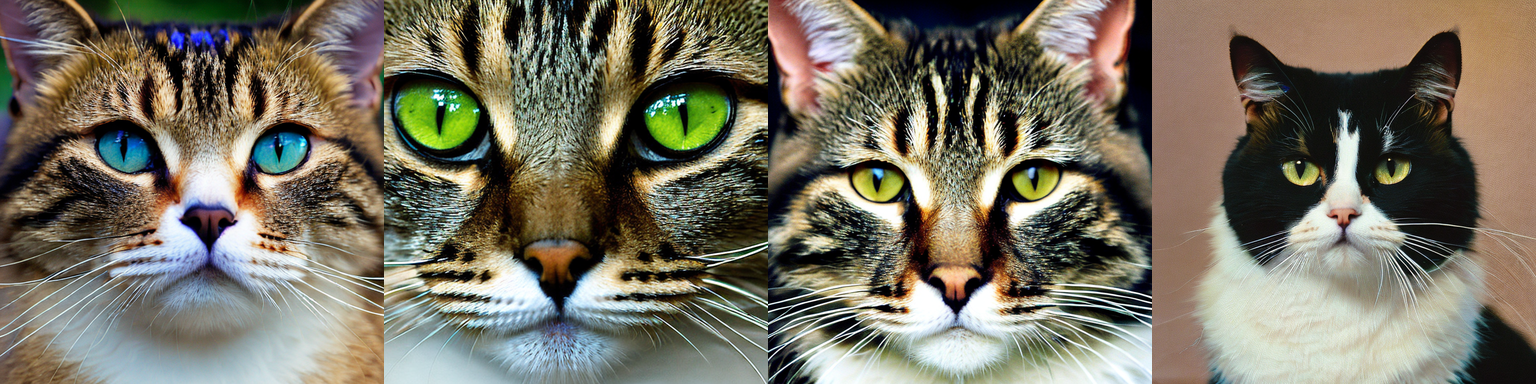

In [45]:
imgs = pipe(prompt,
          #negative_prompt=neg_prompt,
          generator=[torch.Generator("cuda").manual_seed(s) for s in seeds],
          num_inference_steps=35).images

grid = grid_img(imgs, rows=1, cols=len(prompt), scale=0.5)
grid